In [1]:
import sys
sys.path.insert(0, '/scratch_net/biwidl214/jonatank/code_home/restor_MAP/')

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.utils.data as data
from datasets import brats_dataset_subj


In [2]:
data_path = "/scratch_net/biwidl214/jonatank/data/dataset_abnormal/new/brats17/"
img_size = 128
batch_size = 7

slices = [19163, 16109, 23161, 6096, 750, 3559, 1111]
#30, 19163, 23403, 17803, 16109, 23463, 2719, 23466, 1796, 21503, 5887, 6096, 23158, 25330,
#[25346, 25359, 25365, 25335, 25243, 25342, 25250, 25296, 25309, 25350, 25288, 25319, 25378, 25276, 25265, 25264, 25324, 25337, 25271, 25366, 25300, 25244, 25260, 25245, 25339, 25375, 25311, 25313, 25290, 25357,
##                      25343, 25347, 25322, 25256, 25328, 25340, 25331, 25374, 25345, 25285, 25323, 25316, 25349, 25252, 25351,
 #                     25364, 25317, 25330, 25239, 25240, 25314, 25332, 25280, 25344, 25301, 25286, 25363, 25302, 25274, 25315,
 #                     25255, 25368, 25321, 25292, 25373, 25241, 25293, 25238, 25270, 25253, 25305, 25320, 25371, 25272, 25353,
 #                     25247, 25333, 25304, 25254, 25278, 25279, 25299, 25277, 25294, 25369, 25297, 25251, 25361, 25283, 25303,
 #                     25336, 25248, 25356, 25258, 25263, 25257, 25275, 25259, 25307, 25282, 25318, 25327, 25370, 25354, 25325,
 #                     25358, 25376, 25262, 25269, 25291, 25266, 25237, 25329, 25362, 25312, 25242, 25341, 25355, 25360, 25268]

val_subj_dataset = brats_dataset_subj(data_path, 'train', img_size, slices, use_aug=False)
val_subj_loader = data.DataLoader(val_subj_dataset, batch_size=batch_size, shuffle=False, num_workers=3)

Loading train set for subj


In [3]:
img, seg, mask = next(iter(val_subj_loader))

In [5]:
log_model = "/scratch_net/biwidl214/jonatank/logs/restore_implicit/"
model_name = "1subj_3e1_10steps_4fch3sh_saug_0_200"

path_model = log_model + model_name + '.pth'
model = torch.load(path_model, map_location=torch.device("cpu"))
model.eval()

log_model = "/scratch_net/biwidl214/jonatank/logs/unet/"
model10_name = "10subj_0_500"

path_model10 = log_model + model10_name + '.pth'
model10 = torch.load(path_model10, map_location=torch.device("cpu"))
model10.eval()

log_model = "/scratch_net/biwidl214/jonatank/logs/unet/"
model100_name = "100subj_0_500"

path_model100 = log_model + model100_name + '.pth'
model100 = torch.load(path_model100, map_location=torch.device("cpu"))
model100.eval()

UNET(
  (encoder1): Sequential(
    (enc1conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (enc1norm1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (enc1relu1): ReLU(inplace=True)
    (enc1conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (enc1norm2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (enc1relu2): ReLU(inplace=True)
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (encoder2): Sequential(
    (enc2conv1): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (enc2norm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (enc2relu1): ReLU(inplace=True)
    (enc2conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (enc2norm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, tra

In [22]:
model(nn_input)[0].min()

tensor(0.9258, grad_fn=<MinBackward1>)

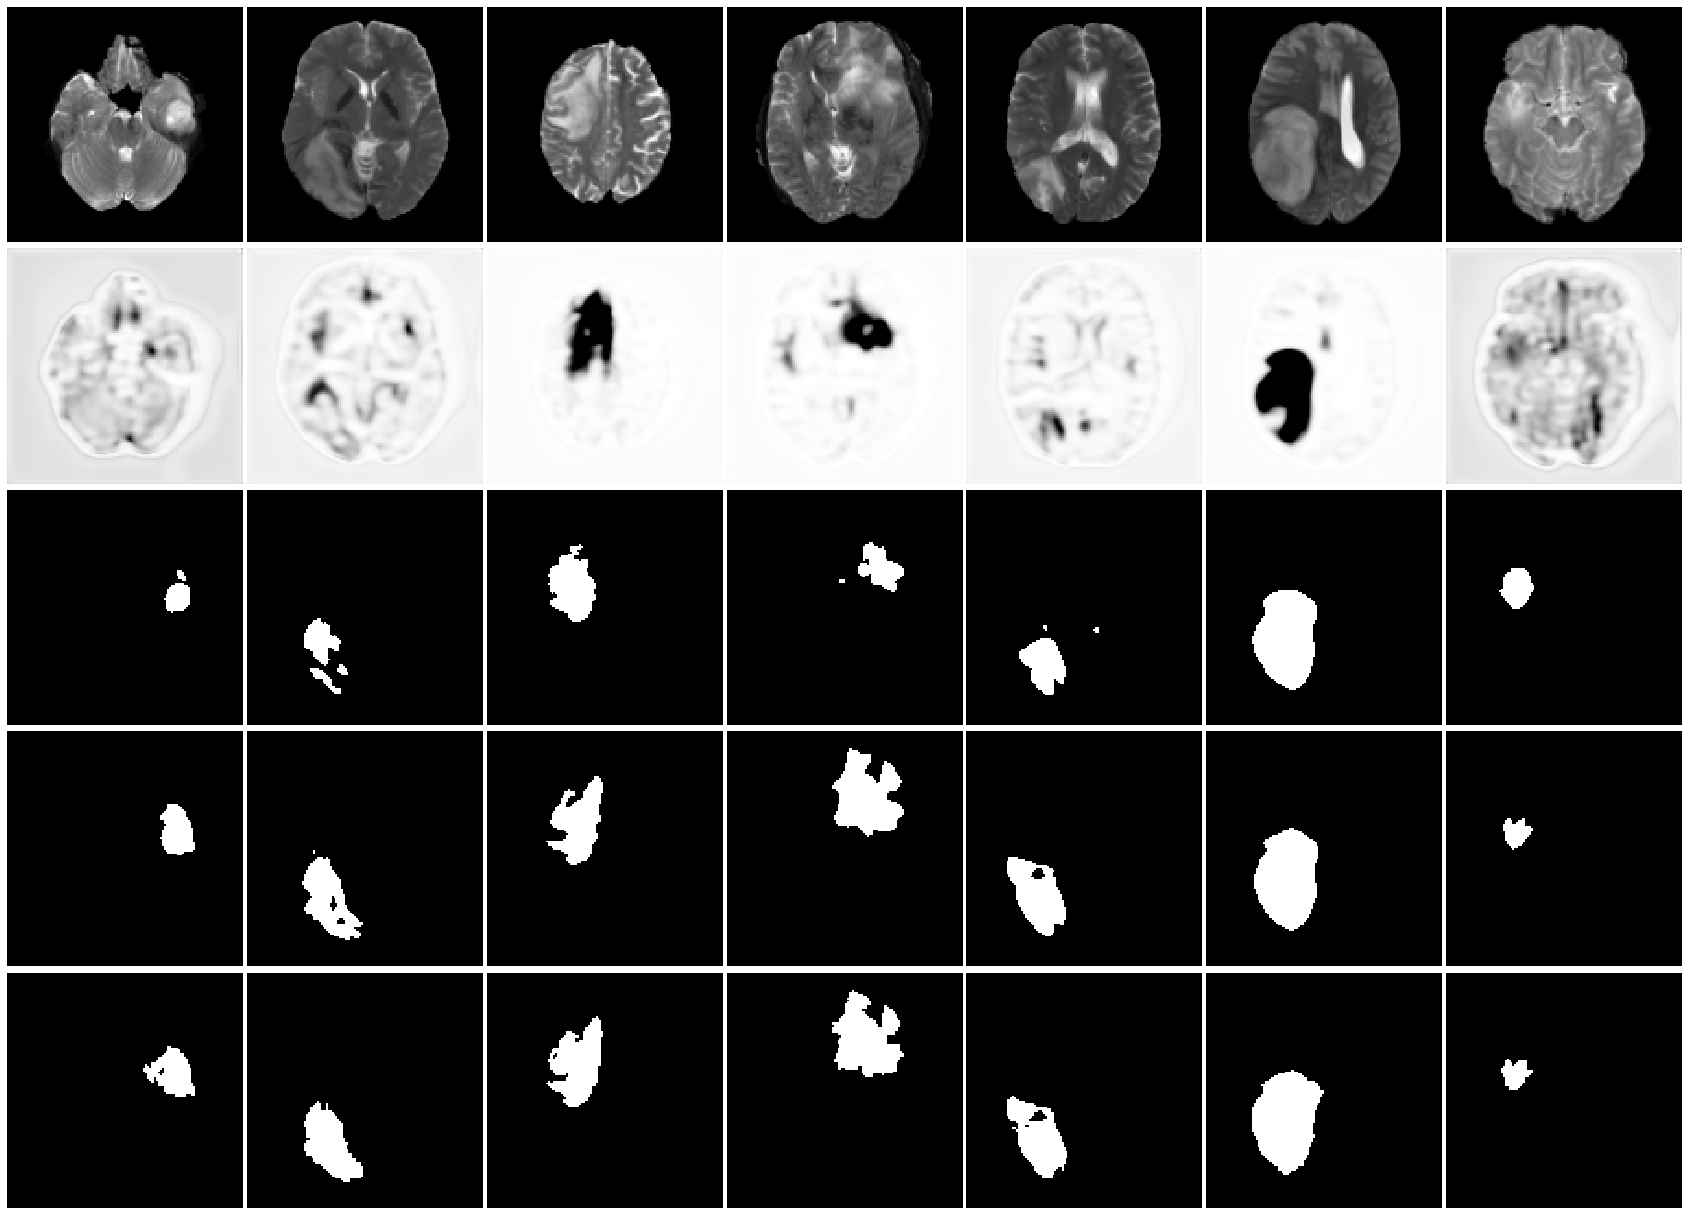

In [18]:
plt.figure(figsize=(30,31))
plt.subplot(7, 7, 1)
plt.imshow(img[0].squeeze(0).detach().numpy() , cmap='gray')
plt.axis('off')
plt.subplot(7, 7, 2)
plt.imshow(img[1].squeeze(0).detach().numpy() , cmap='gray')
plt.axis('off')
plt.subplot(7, 7, 3)
plt.imshow(img[2].squeeze(0).detach().numpy() , cmap='gray')
plt.axis('off')
plt.subplot(7, 7, 4)
plt.imshow(img[3].squeeze(0).detach().numpy() , cmap='gray')
plt.axis('off')
plt.subplot(7, 7, 5)
plt.imshow(img[4].squeeze(0).detach().numpy() , cmap='gray')
plt.axis('off')
plt.subplot(7, 7, 6)
plt.imshow(img[5].squeeze(0).detach().numpy() , cmap='gray')
plt.axis('off')
plt.subplot(7, 7, 7)
plt.imshow(img[6].squeeze(0).detach().numpy() , cmap='gray')
plt.axis('off')
### ROW 1

nn_input = torch.stack([img.squeeze(1), img.squeeze(1)]).permute((1, 0, 2, 3)).float()

plt.subplot(7, 7, 8)
plt.imshow(model(nn_input)[0].squeeze(0).detach().numpy() , cmap='gray')
plt.axis('off')
plt.subplot(7, 7, 9)
plt.imshow(model(nn_input)[1].squeeze(0).detach().numpy() , cmap='gray')
plt.axis('off')
plt.subplot(7, 7, 10)
plt.imshow(model(nn_input)[2].squeeze(0).detach().numpy() , cmap='gray')
plt.axis('off')
plt.subplot(7, 7, 11)
plt.imshow(model(nn_input)[3].squeeze(0).detach().numpy() , cmap='gray')
plt.axis('off')
plt.subplot(7, 7, 12)
plt.imshow(model(nn_input)[4].squeeze(0).detach().numpy() , cmap='gray')
plt.axis('off')
plt.subplot(7, 7, 13)
plt.imshow(model(nn_input)[5].squeeze(0).detach().numpy() , cmap='gray')
plt.axis('off')
plt.subplot(7, 7, 14)
plt.imshow(model(nn_input)[6].squeeze(0).detach().numpy() , cmap='gray')
plt.axis('off')
### ROW 2
"""
plt.subplot(7, 5, 11)
plt.imshow(model3(img)[0].squeeze(0).detach().numpy().round() , cmap='gray')
plt.axis('off')
plt.subplot(7, 5, 12)
plt.imshow(model3(img)[1].squeeze(0).detach().numpy().round() , cmap='gray')
plt.axis('off')
plt.subplot(7, 5, 13)
plt.imshow(model3(img)[2].squeeze(0).detach().numpy().round() , cmap='gray')
plt.axis('off')
plt.subplot(7, 5, 14)
plt.imshow(model3(img)[3].squeeze(0).detach().numpy().round() , cmap='gray')
plt.axis('off')
plt.subplot(7, 5, 15)
plt.imshow(model3(img)[4].squeeze(0).detach().numpy().round() , cmap='gray')
plt.axis('off')
"""
### ROW 3
plt.subplot(7, 7, 15)
plt.imshow(model10(img)[0].squeeze(0).detach().numpy().round() , cmap='gray')
plt.axis('off')
plt.subplot(7, 7, 16)
plt.imshow(model10(img)[1].squeeze(0).detach().numpy().round() , cmap='gray')
plt.axis('off')
plt.subplot(7, 7, 17)
plt.imshow(model10(img)[2].squeeze(0).detach().numpy().round() , cmap='gray')
plt.axis('off')
plt.subplot(7, 7, 18)
plt.imshow(model10(img)[3].squeeze(0).detach().numpy().round() , cmap='gray')
plt.axis('off')
plt.subplot(7, 7, 19)
plt.imshow(model10(img)[4].squeeze(0).detach().numpy().round() , cmap='gray')
plt.axis('off')
plt.subplot(7, 7, 20)
plt.imshow(model10(img)[5].squeeze(0).detach().numpy().round() , cmap='gray')
plt.axis('off')
plt.subplot(7, 7, 21)
plt.imshow(model10(img)[6].squeeze(0).detach().numpy().round() , cmap='gray')
plt.axis('off')
### ROW 4
"""
plt.subplot(7, 5, 21)
plt.imshow(model10(img)[0].squeeze(0).detach().numpy().round() , cmap='gray')
plt.axis('off')
plt.subplot(7, 5, 22)
plt.imshow(model10(img)[1].squeeze(0).detach().numpy().round() , cmap='gray')
plt.axis('off')
plt.subplot(7, 5, 23)
plt.imshow(model10(img)[2].squeeze(0).detach().numpy().round() , cmap='gray')
plt.axis('off')
plt.subplot(7, 5, 24)
plt.imshow(model10(img)[3].squeeze(0).detach().numpy().round() , cmap='gray')
plt.axis('off')
plt.subplot(7, 5, 25)
plt.imshow(model10(img)[4].squeeze(0).detach().numpy().round() , cmap='gray')
plt.axis('off')
"""
# ROW 5
plt.subplot(7, 7, 22)
plt.imshow(model100(img)[0].squeeze(0).detach().numpy().round() , cmap='gray')
plt.axis('off')
plt.subplot(7, 7, 23)
plt.imshow(model100(img)[1].squeeze(0).detach().numpy().round() , cmap='gray')
plt.axis('off')
plt.subplot(7, 7, 24)
plt.imshow(model100(img)[2].squeeze(0).detach().numpy().round() , cmap='gray')
plt.axis('off')
plt.subplot(7, 7, 25)
plt.imshow(model100(img)[3].squeeze(0).detach().numpy().round() , cmap='gray')
plt.axis('off')
plt.subplot(7, 7, 26)
plt.imshow(model100(img)[4].squeeze(0).detach().numpy().round() , cmap='gray')
plt.axis('off')
plt.subplot(7, 7, 27)
plt.imshow(model100(img)[5].squeeze(0).detach().numpy().round() , cmap='gray')
plt.axis('off')
plt.subplot(7, 7, 28)
plt.imshow(model100(img)[6].squeeze(0).detach().numpy().round() , cmap='gray')
plt.axis('off')
# ROW 6
plt.subplot(7, 7, 29)
plt.imshow(seg[0].squeeze(0).detach().numpy(), cmap='gray')
plt.axis('off')
plt.subplot(7, 7, 30)
plt.imshow(seg[1].squeeze(0).detach().numpy() , cmap='gray')
plt.axis('off')
plt.subplot(7, 7, 31)
plt.imshow(seg[2].squeeze(0).detach().numpy() , cmap='gray')
plt.axis('off')
plt.subplot(7, 7, 32)
plt.imshow(seg[3].squeeze(0).detach().numpy() , cmap='gray')
plt.axis('off')
plt.subplot(7, 7, 33)
plt.imshow(seg[4].squeeze(0).detach().numpy() , cmap='gray')
plt.axis('off')
plt.subplot(7, 7, 34)
plt.imshow(seg[5].squeeze(0).detach().numpy() , cmap='gray')
plt.axis('off')
plt.subplot(7, 7, 35)
plt.imshow(seg[6].squeeze(0).detach().numpy() , cmap='gray')
plt.axis('off')
plt.subplots_adjust(wspace=0.02, hspace=0.02)
